In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mp
from pickle import Pickler
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.basemap import Basemap
import netCDF4 as nc
from salishsea_tools import  psu_tools
from seawater import eos80 
import datetime, dateutil.parser

%matplotlib inline

In [3]:
etopo1 = nc.Dataset('/ocean/mgrenier/geotraces/research/ModelEval/BathyArctic/ETOPO1_Bed_g_gmt4.grd')
# Define numpy array 
lon_etopo = etopo1.variables['x'][:]
lat_etopo = etopo1.variables['y'][:]
bathy_etopo = etopo1.variables['z'][:]
llon, llat = np.meshgrid(lon_etopo, lat_etopo)

In [4]:
directory = '/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/'


In [5]:
import Data

data,sta,date,lon,lat,P,d,t,s,theta,Tpot,Tr,fluo,oxy_uM,oxy_mL,rho,isop,si,ti,NO3_1,NO3_2,PO3_1,PO3_2,SiO4_1,SiO4_2,nut = Data.AllData_variables()
PaThData,PaTh_sta,PaTh_lon,PaTh_lat,PaTh_t,PaTh_s,PaTh_theta,PaTh_rho,PaTh_d = Data.PaTh_variables()
listAllSta,listPaThSta,PaThDataSorted,PaThSort_sta,PaThSort_d,Pa,Th,PaTh,PaErr,ThErr,PaThErr = Data.PaTh_varSorted()

/home/mgrenier/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (0,10,11,28,30,31,32,33,34,35,36,37,38,39,41,42,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/ocean/mgrenier/geotraces/analysis-Melanie/notebooks/Geotraces2015data/Data.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data.Tpot[thetaOnly] = data.theta[thetaOnly]
/ocean/mgrenier/geotraces/analysis-Melanie/notebooks/Geotraces2015data/DerivVar.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  isop = np.zeros((ydim,xdim))


453.0 13.0


/home/mgrenier/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2885: DtypeWarning: Columns (0,10,11,28,30,31,32,33,34,35,36,37,38,39,41,42,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


453.0 13.0
453.0 13.0


/home/mgrenier/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: DtypeWarning: Columns (0,10,11,28,30,31,32,33,34,35,36,37,38,39,41,42,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.


453.0 13.0


In [5]:
### Listing the Pa/Th stations
ind = PaTh_lon.index.tolist()
listPaThLon = []
listPaThLat = []
listPaThSta = []
listPaThDate = []

for i in range(0,len(PaTh_lon),1):
#    if (PaTh_lon[ind[i]] not in listPaThLon):
    if ((PaTh_lon[ind[i]] not in listPaThLon) & (PaTh_lat[ind[i]] not in listPaThLat) 
        & (PaTh_sta[ind[i]] not in listPaThSta)):
        listPaThLon.append(PaTh_lon[ind[i]].tolist())
        listPaThLat.append(PaTh_lat[ind[i]].tolist())
        listPaThSta.append(PaTh_sta[ind[i]])
        listPaThDate.append(PaThData.date[ind[i]])


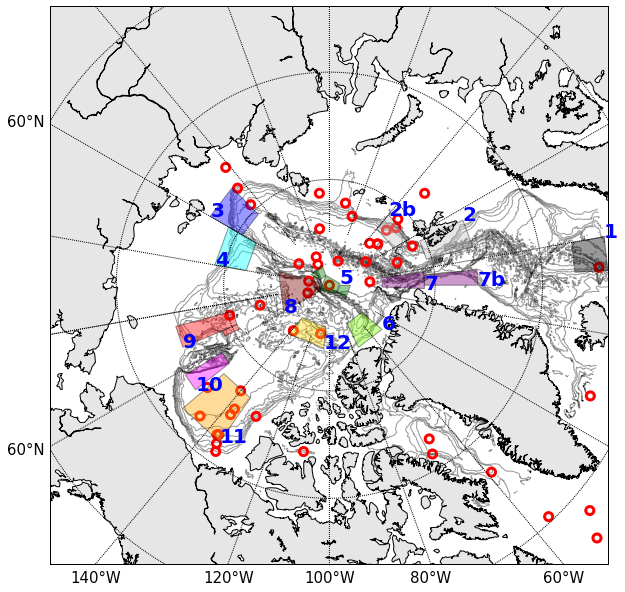

In [7]:
fig,ax=plt.subplots(1,1,facecolor='w',figsize=(10,10))
m = Basemap(projection='npstere',boundinglat=64,lon_0=-100,round=False,resolution='l')
m.drawcoastlines()
x_lon,y_lat = m(llon[9240:10801,:],llat[9240:10801,:])
mp.rcParams['contour.negative_linestyle'] = 'solid'
clevs = [-5000,-4500,-4000,-3500,-3000,-2500,-2000,-1500,-1000,-500]
m.fillcontinents(color = '0.9',alpha=1,zorder = 1)
m.drawparallels(np.arange(50.,90.,10.),labels=[1, 0, 0, 0],fontsize=15,zorder=1)
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1],latmax=85,fontsize=15,zorder=1)
m.contour(x_lon,y_lat,bathy_etopo[9240:10801,:],clevs,linewidth=0.075,colors='black',alpha=0.4,zorder=-1)

mlon_Data,mlat_Data = m(listPaThLon,listPaThLat)
#for hpos,vpos in zip((),()):
ax.scatter(mlon_Data,mlat_Data,marker='o',facecolors='none',linewidth='3',edgecolors='r',s=65,zorder=1)
'''for i in range(0,len(listPaThSta),1): # if want to annotate, verify that basemap boundaries include 
                                         # the coordinates of the annotations, otherwise it's gonna bug and 
                                         # kill the kernel 
    #print(i)
    ax.annotate(listPaThSta[i], (mlon_Data[i]+.01, mlat_Data[i]+.01),fontsize=15,color='r',fontweight='bold' )
'''
from matplotlib.patches import Polygon
c=['k','silver','silver','b','cyan','g','chartreuse','purple','purple','maroon','r','magenta','orange','gold','g','g','r']
i=0
'''
def draw_screen_poly(lats, lons, m):
    x, y = m(lons,lats )
    xy = list(zip(x,y))
    #poly = Polygon(xy, edgecolor= 'k', facecolor='r', alpha=0.4 )
    poly = Polygon(xy, edgecolor= 'k', facecolor=c[i], alpha=0.4 )
    plt.gca().add_patch(poly)
'''

area1 = ([64,67,67,64],[-7,-7,0,0]) # updated
area2 = ([76,80.5,80.5,76],[5,5,16,16]) # updated
area2b = ([81.3,83,83,81.3],[20,20,40,40]) # updated
area3 = ([77,80.5,80.5,77],[125,125,140,140]) # updated -> no changes needed
area4 = ([79,82,82,79],[140,140,160,160]) # updated -> no changes needed
area5 = ([89,89,89,89],[-60,-160,100,0]) # updated -> no changes needed
area5b = ([88,89,89,88],[140,140,100,100]) # updated -> no changes needed
area5c = ([88,89,89,88],[-50,-50,-10,-10]) # updated -> no changes needed
area6 = ([83.5,86,86,83.5],[-75,-75,-50,-50]) # updated 
area7 = ([81,85,85,81],[-2,-2,-12,-12]) # updated
area7b = ([76,81,81,76],[-4,-4,-10,-10]) # updated
area8 = ([85,89,89,85],[155,155,-160,-160])
area9 = ([75,80.5,80.5,75],[-175,-175,-167,-167]) # updated -> no changes needed
area9b = ([79,80.5,80.5,79],[-167,-167,-164,-164]) # updated
area10 = ([74,78,78,74],[-158,-158,-152,-152])
area11 = ([72,77,77,72],[-150,-150,-135,-135])
area12 = ([84,86,86,84],[-140,-140,-105,-105])
lev=np.arange(20,250,20)

for lats,lons in zip((area1[0],area2[0],area2b[0],area3[0],area4[0],area5[0],
                      area6[0],area7[0],area7b[0],area8[0],area9[0],area10[0],area11[0],area12[0],area5b[0],area5c[0],area9b[0]),
                     (area1[1],area2[1],area2b[1],area3[1],area4[1],area5[1],
                      area6[1],area7[1],area7b[1],area8[1],area9[1],area10[1],area11[1],area12[1],area5b[1],area5c[1],area9b[1])):
    x, y = m(lons,lats )
    xy = list(zip(x,y))
    #poly = Polygon(xy, edgecolor= 'k', facecolor='r', alpha=0.4 )
    poly = Polygon(xy, edgecolor= 'k', facecolor=c[i], alpha=0.4 )
    plt.gca().add_patch(poly)
    if i < 2:
        ax.annotate('%s' % (i+1),(x[3],y[3]),color='b',fontsize=20,fontweight='bold')
    if i == 2:
        ax.annotate('%sb' % (i),(x[3],y[3]),color='b',fontsize=20,fontweight='bold')
    if (i > 2) & (i < 8):
        ax.annotate('%s' % (i),(x[3],y[3]),color='b',fontsize=20,fontweight='bold')
    if i == 8:
        ax.annotate('%sb' % (i-1),(x[3],y[3]),color='b',fontsize=20,fontweight='bold')
    if (i > 8) & (i < 14):
        ax.annotate('%s' % (i-1),(x[3],y[3]),color='b',fontsize=20,fontweight='bold')
        #ax.annotate('2',(x[0],y[0]),color='k',fontsize=15,fontweight='bold')
    i += 1
plt.show() 
fig.savefig('/ocean/mgrenier/geotraces/analysis-Melanie/notebooks/Geotraces2015data/Figures/WOD-area-definition.png', bbox_inches='tight')

In [ ]:
area1 = ([64,67,67,64],[-10,-10,0,0]) # Old def
area2 = ([76,82,82,76],[5,5,20,20]) # Old def
area2b = ([80.5,83,83,80.5],[20,20,40,40]) # Old def
area3 = ([77,80.5,80.5,77],[125,125,140,140])
area4 = ([79,82,82,79],[140,140,160,160])
area5 = ([89,89,89,89],[-60,-160,100,0])
area5b = ([88,89,89,88],[140,140,100,100])
area5c = ([88,89,89,88],[-50,-50,-10,-10])
area6 = ([83,86,86,83],[-90,-90,-50,-50]) # Old def
area7 = ([81,85,85,81],[0,0,-20,-20]) # Old def
area7b = ([76,81,81,76],[5,5,-10,-10]) # Old def
area8 = ([85,89,89,85],[155,155,-160,-160])
area9 = ([75,80.5,80.5,75],[-175,-175,-167,-167])
area9b = ([79,81,81,79],[-167,-167,-160,-160]) # Old def
area10 = ([74,78,78,74],[-158,-158,-152,-152])
area11 = ([72,77,77,72],[-150,-150,-135,-135])
area12 = ([84,86,86,84],[-140,-140,-105,-105])

## !! Note: See "WOD-fromODV-64N90N-TemperatureOnIsopycn27.9-SpecificAreas-define" notebook to see the extraction of data per area, defining each dataframe area1 to area12  !!

In [6]:
area1 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area1-pickled')
area2 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area2-pickled')
area2b = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area2b-pickled')
area3 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area3-pickled')
area4 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area4-pickled')
area5 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area5-pickled')
area6 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area6-pickled')
area7 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area7-pickled')
area7b = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area7b-pickled')
area8 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area8-pickled')
area9 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area9-pickled')
area10 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area10-pickled')
area11 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area11-pickled')
area12 = pd.read_pickle('/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/area12-pickled')



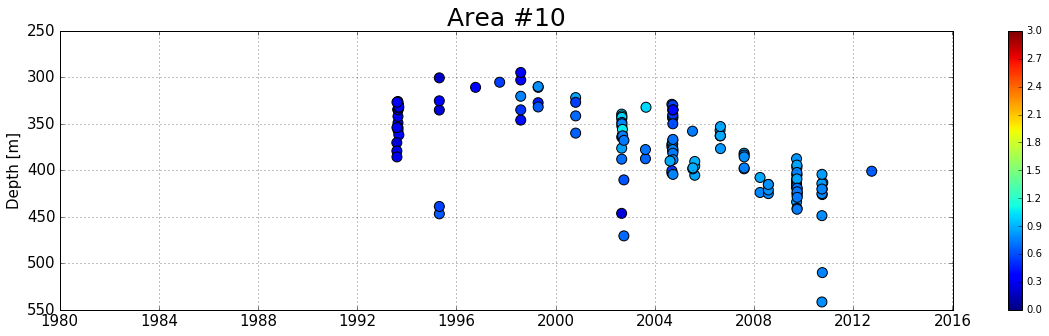

In [12]:
fig,ax=plt.subplots(1,1,facecolor='w',figsize=(20,5))
XaxisD = np.arange('1980-01-01', '2016-01-01', dtype='datetime64[D]')        
ConvertDate = []

ind = area10.index.tolist()
for i in range(0,len(ind),1):
    d = dateutil.parser.parse(area10.Date[ind[i]])
    ConvertDate.append(d.strftime('%Y-%m-%d')) 
ConvertDate = pd.to_datetime(ConvertDate)

sc=ax.scatter(ConvertDate,area10.d,c=area10.temp.tolist(),s=100,vmin=0,vmax=3)
plt.colorbar(sc)
ax.set_title('Area #10', fontsize = '25')
ax.set_ylabel('Depth [m]',fontsize='15')
ax.set_xlim(['1980-01-01','2016-01-01'])
ax.set_ylim([250,550])
ax.tick_params(labelsize=15)
ax.grid()
ax.invert_yaxis()
#XaxisD

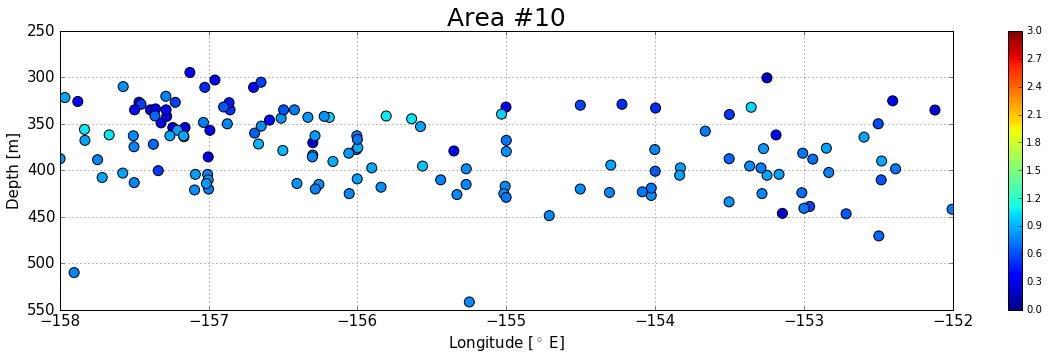

In [14]:
fig,ax=plt.subplots(1,1,facecolor='w',figsize=(20,5))

sc=ax.scatter(area10.Lon,area10.d,c=area10.temp.tolist(),s=100,vmin=0,vmax=3)
plt.colorbar(sc)
ax.set_title('Area #10', fontsize = '25')
ax.set_ylabel('Depth [m]',fontsize='15')
ax.set_xlabel('Longitude [$^\circ$ E]',fontsize='15')
ax.set_xlim([-158,-152])
ax.set_ylim([250,550])
ax.tick_params(labelsize=15)
ax.grid()
ax.invert_yaxis()
#XaxisD

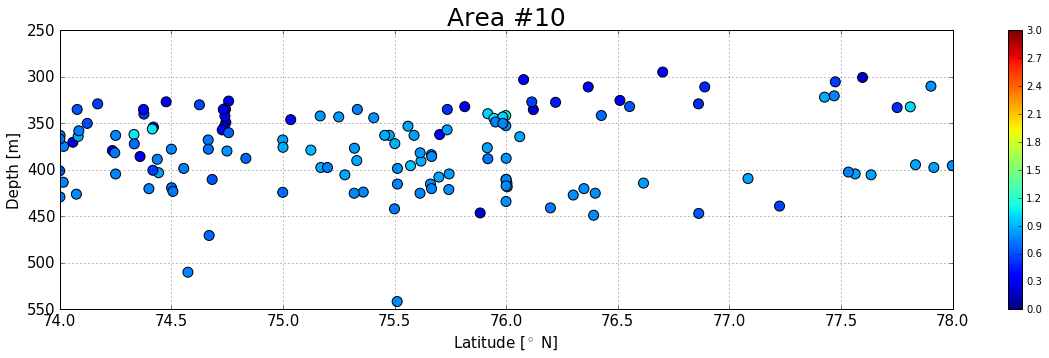

In [15]:
fig,ax=plt.subplots(1,1,facecolor='w',figsize=(20,5))

sc=ax.scatter(area10.Lat,area10.d,c=area10.temp.tolist(),s=100,vmin=0,vmax=3)
plt.colorbar(sc)
ax.set_title('Area #10', fontsize = '25')
ax.set_ylabel('Depth [m]',fontsize='15')
ax.set_xlabel('Latitude [$^\circ$ N]',fontsize='15')
ax.set_xlim([74,78])
ax.set_ylim([250,550])
ax.tick_params(labelsize=15)
ax.grid()
ax.invert_yaxis()
#XaxisD

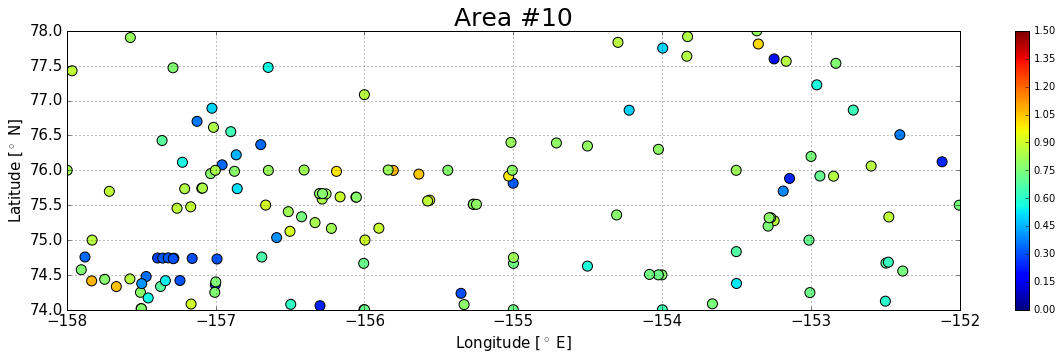

In [16]:
fig,ax=plt.subplots(1,1,facecolor='w',figsize=(20,5))

sc=ax.scatter(area10.Lon,area10.Lat,c=area10.temp.tolist(),s=100,vmin=0,vmax=1.5)
plt.colorbar(sc)
ax.set_title('Area #10', fontsize = '25')
ax.set_xlabel('Longitude [$^\circ$ E]',fontsize='15')
ax.set_ylabel('Latitude [$^\circ$ N]',fontsize='15')
ax.set_xlim([-158,-152])
ax.set_ylim([74,78])
ax.tick_params(labelsize=15)
ax.grid()


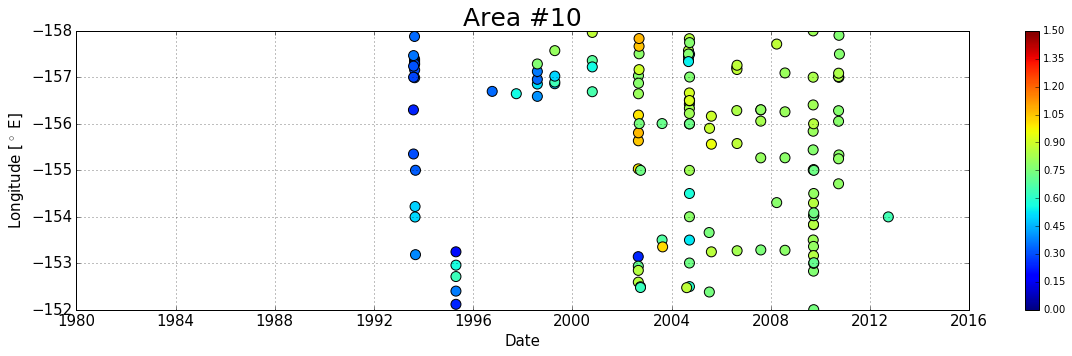

In [17]:
fig,ax=plt.subplots(1,1,facecolor='w',figsize=(20,5))

ConvertDate = []
ind = area10.index.tolist()
for i in range(0,len(ind),1):
    d = dateutil.parser.parse(area10.Date[ind[i]])
    ConvertDate.append(d.strftime('%Y-%m-%d')) 
ConvertDate = pd.to_datetime(ConvertDate)

sc=ax.scatter(ConvertDate,area10.Lon,c=area10.temp.tolist(),s=100,vmin=0,vmax=1.5)
plt.colorbar(sc)
ax.set_title('Area #10', fontsize = '25')
ax.set_ylabel('Longitude [$^\circ$ E]',fontsize='15')
ax.set_xlabel('Date',fontsize='15')
ax.set_xlim(['1980-01-01','2016-01-01'])
ax.set_ylim([-158,-152])
#ax.set_ylim([150,300])
ax.tick_params(labelsize=15)
ax.grid()
ax.invert_yaxis()

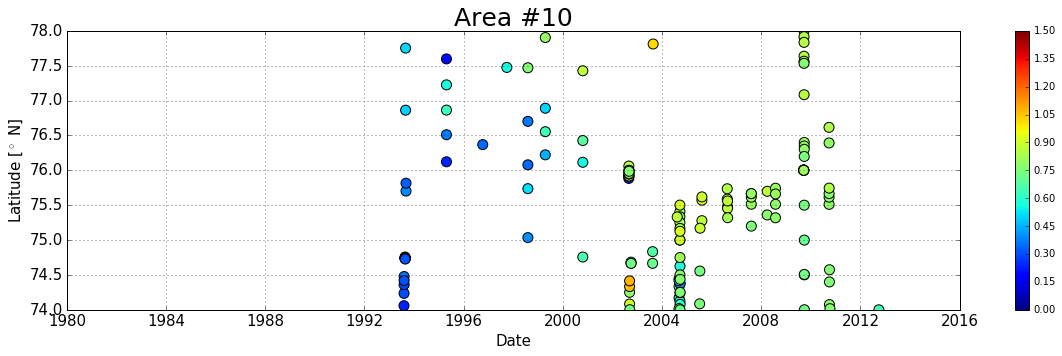

In [18]:
fig,ax=plt.subplots(1,1,facecolor='w',figsize=(20,5))

ConvertDate = []
ind = area10.index.tolist()
for i in range(0,len(ind),1):
    d = dateutil.parser.parse(area10.Date[ind[i]])
    ConvertDate.append(d.strftime('%Y-%m-%d')) 
ConvertDate = pd.to_datetime(ConvertDate)

sc=ax.scatter(ConvertDate,area10.Lat,c=area10.temp.tolist(),s=100,vmin=0,vmax=1.5)
plt.colorbar(sc)
ax.set_title('Area #10', fontsize = '25')
ax.set_ylabel('Latitude [$^\circ$ N]',fontsize='15')
ax.set_xlabel('Date',fontsize='15')
ax.set_xlim(['1980-01-01','2016-01-01'])
ax.set_ylim([74,78])
#ax.set_ylim([150,300])
ax.tick_params(labelsize=15)
ax.grid()


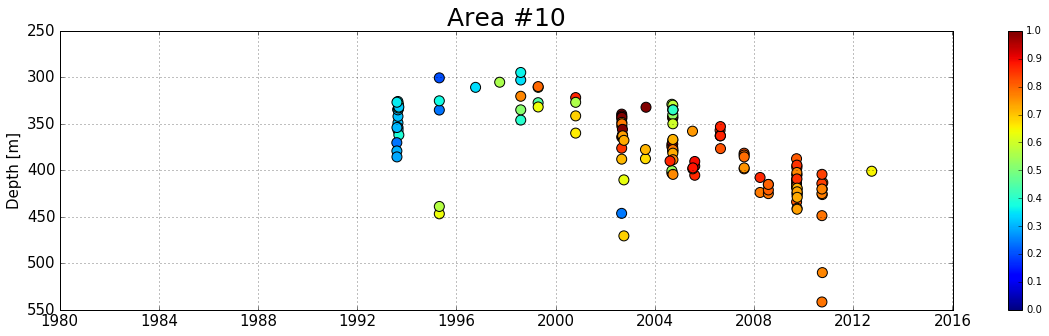

In [11]:
fig,ax=plt.subplots(1,1,facecolor='w',figsize=(20,5))

ConvertDate = []
ind = area10.index.tolist()
for i in range(0,len(ind),1):
    d = dateutil.parser.parse(area10.Date[ind[i]])
    ConvertDate.append(d.strftime('%Y-%m-%d')) 
ConvertDate = pd.to_datetime(ConvertDate)

sc=ax.scatter(ConvertDate,area10.d,c=area10.temp.tolist(),s=100,vmin=0,vmax=1.0)
plt.colorbar(sc)
ax.set_title('Area #10', fontsize = '25')
ax.set_ylabel('Depth [m]',fontsize='15')
ax.set_xlim(['1980-01-01','2016-01-01'])
ax.set_ylim([250,550])
ax.tick_params(labelsize=15)
ax.grid()
ax.invert_yaxis()
#XaxisD

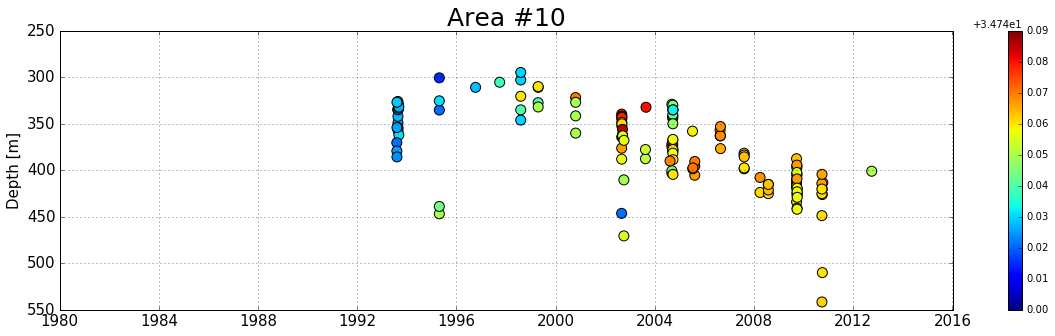

In [10]:
fig,ax=plt.subplots(1,1,facecolor='w',figsize=(20,5))

ConvertDate = []
ind = area10.index.tolist()
for i in range(0,len(ind),1):
    d = dateutil.parser.parse(area10.Date[ind[i]])
    ConvertDate.append(d.strftime('%Y-%m-%d')) 
ConvertDate = pd.to_datetime(ConvertDate)

sc=ax.scatter(ConvertDate,area10.d,c=area10.sal.tolist(),s=100,vmin=34.74,vmax=34.83)
plt.colorbar(sc)
ax.set_title('Area #10', fontsize = '25')
ax.set_ylabel('Depth [m]',fontsize='15')
ax.set_xlim(['1980-01-01','2016-01-01'])
ax.set_ylim([250,550])
ax.tick_params(labelsize=15)
ax.grid()
ax.invert_yaxis()
#XaxisD

In [52]:
xi=(pd.to_timedelta(np.arange(13149),unit='d')+pd.to_timedelta(1,unit='s')) / np.timedelta64(1,'D')
#xi = np.arange('1980-01-01', '2016-01-01', dtype='datetime64[D]') 
xi
X,Y,X.size,Y.size
ConvertDate,area1.d.tolist()
ConvertDate.size,len(area1.d.tolist())
xi = np.arange(-7,0,0.01)
len(area1.temp.tolist()), len(area1.Lon.tolist()),len(area1.d.tolist())
Z

array([[        nan,  2.84739013,  2.84540674, ...,         nan,
                nan,         nan],
       [        nan,  2.86900538,  2.867022  , ...,         nan,
                nan,         nan],
       [        nan,  2.89062063,  2.88863725, ...,         nan,
                nan,         nan],
       ..., 
       [        nan,         nan,         nan, ...,  2.5789892 ,
         2.61592102,  2.65285284],
       [        nan,         nan,         nan, ...,  2.09900625,
         2.13593807,  2.17286989],
       [        nan,         nan,         nan, ...,  1.37545691,
         1.60205423,  1.82865156]])

In [31]:
labels;X_conv0 = num2date(labels, tz=None)
X_conv = []
for i in range(0,len(X_conv0),1):
    #conv = X_conv0[i].strftime('%Y-%m-%d')
    conv = X_conv0[i].strftime('%Y')
    X_conv.append(conv)
X_conv
#min(AxDate2num),max(AxDate2num)
#num2date(min(AxDate2num)),num2date(max(AxDate2num))

['1977-10-08',
 '1983-03-31',
 '1988-09-20',
 '1994-03-13',
 '1999-09-03',
 '2005-02-23',
 '2010-08-16',
 '2016-02-06']

In [39]:
test = ['1980-01-01','1984-01-01','1988-01-01','1992-01-01','1996-01-01','2000-01-01','2004-01-01',
        '2008-01-01','2012-01-01','2016-01-01']
test = pd.to_datetime(test)

test3 = []
for i in range(0,len(test),1):
    test2 = date2num(test[i])
    test3.append(test2)
test3

[722815.0,
 724276.0,
 725737.0,
 727198.0,
 728659.0,
 730120.0,
 731581.0,
 733042.0,
 734503.0,
 735964.0]

In [54]:
area1 = area1[area1.Lon > -7]

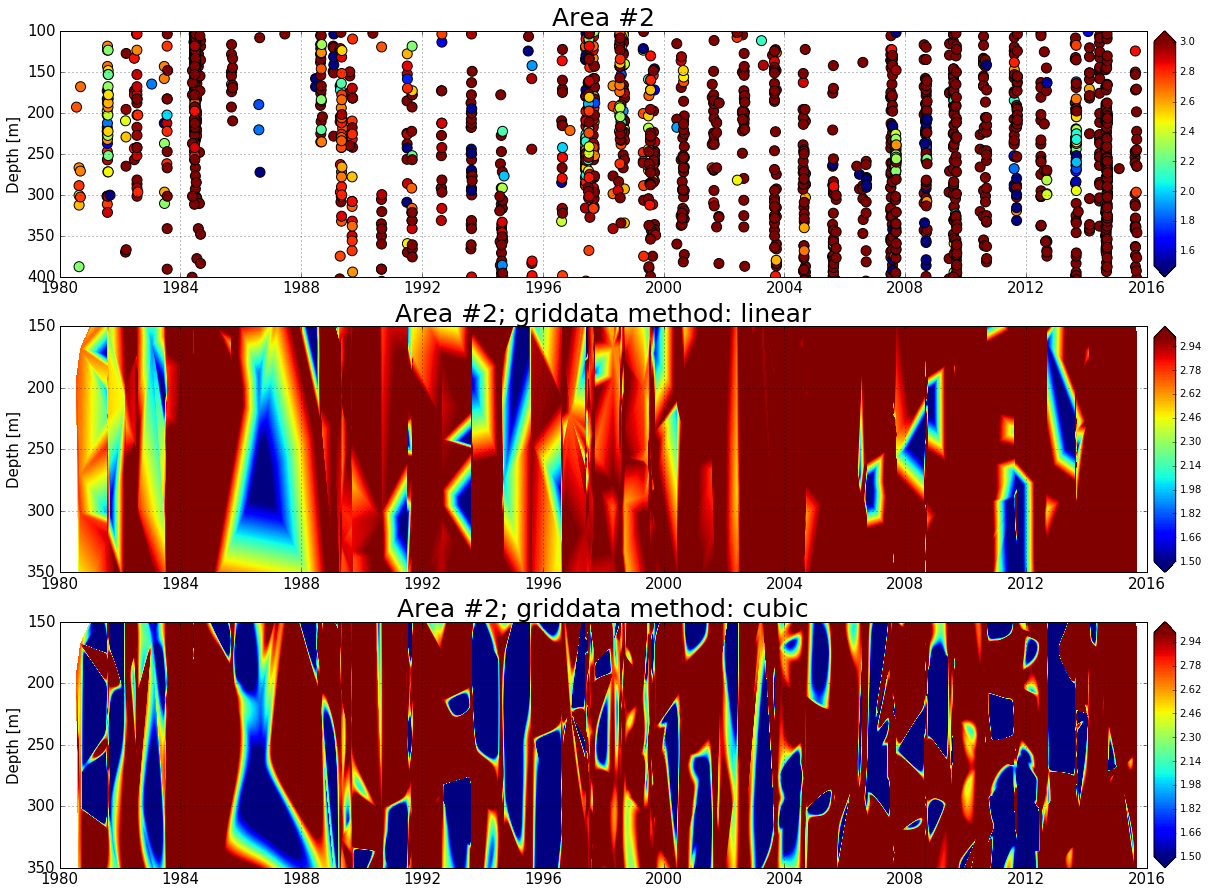

In [31]:
from numpy import linspace, meshgrid
from scipy.interpolate import griddata
from matplotlib.dates import date2num,num2date

fig,(ax1,ax2,ax3)=plt.subplots(3,1,facecolor='w',figsize=(20,15))
#fig,ax = plt.subplots(1,1,facecolor='w',figsize=(20,5))

ConvertDate = []
ConvertDateNum = []
AxDate2num = []

ind = area2.index.tolist()
for i in range(0,len(ind),1):
    d = dateutil.parser.parse(area2.Date[ind[i]])
    ConvertDate.append(d.strftime('%Y-%m-%d')) 
ConvertDate = pd.to_datetime(ConvertDate)

sc=ax1.scatter(ConvertDate,area2.d,c=area2.temp.tolist(),s=100,vmin=1.5,vmax=3)
divider = make_axes_locatable(ax1)
caxX = divider.append_axes("right", size="2%", pad=0.1)
cbar = plt.colorbar(sc, cax=caxX, extend = 'both')
ax1.set_title('Area #2', fontsize = '25')
ax1.set_ylabel('Depth [m]',fontsize='15')
ax1.set_xlim(['1980-01-01','2016-01-01'])
ax1.set_ylim([100,400])
ax1.tick_params(labelsize=15)
ax1.grid()
ax1.invert_yaxis()


for i in range(0,len(ConvertDate),1):
    Conv2num = date2num(ConvertDate[i])
    ConvertDateNum.append(Conv2num)

#sc=ax.contourf(ConvertDate,area2.d,area2.temp.tolist())#,s=100,vmin=1.5,vmax=3)
res=1; xylim = [150, 351]
clevs = np.arange(1.50,3.01,0.01)
xi = np.arange('1980-01-01', '2016-01-02', dtype='datetime64[D]') 
xi_conv = pd.to_datetime(xi)
for i in range(0,len(xi_conv),1):
    Conv2num = date2num(xi_conv[i])
    AxDate2num.append(Conv2num)

yi = np.arange(xylim[0], xylim[1], res)
X, Y = np.meshgrid(AxDate2num, yi)

for ax,met in zip((ax2,ax3),('linear','cubic')):
    Z = griddata((ConvertDateNum,area2.d.tolist()), area2.temp.tolist(), (X,Y),method=met)

    cf = ax.contourf(X, Y, Z, clevs, extend='both')

    ## Rearrange the xaxis tick intervals
    Xtick0 = ['1980-01-01','1984-01-01','1988-01-01','1992-01-01','1996-01-01','2000-01-01','2004-01-01',
            '2008-01-01','2012-01-01','2016-01-01']
    Xtick0 = pd.to_datetime(Xtick0)

    Xtick = []
    for i in range(0,len(Xtick0),1):
        conv = date2num(Xtick0[i])
        Xtick.append(conv)

    ax.set_xticks(Xtick)                                                       

    labels = ax.get_xticks().tolist()
    X_conv0 = num2date(labels, tz=None)
    X_conv = []
    for i in range(0,len(X_conv0),1):
        conv = X_conv0[i].strftime('%Y')
        X_conv.append(conv)
    X_conv

    divider = make_axes_locatable(ax)
    caxX = divider.append_axes("right", size="2%", pad=0.1)
    cbar = plt.colorbar(cf, cax=caxX)

    ax.set_title('Area #2; griddata method: %s' % met, fontsize = '25')
    ax.set_ylabel('Depth [m]',fontsize='15')
    #ax.set_ylim([150,300])


    ax.set_xticklabels(X_conv)
    #ax.set_xlim([min(AxDate2num),max(AxDate2num)])
    ax.set_xlim(722815.0, 735964.0)
    ax.tick_params(labelsize=15)
    ax.grid()
    ax.invert_yaxis()
